# Predicting the used car price

In this work I will use the test data set to see if we can predict the used car price using naive-Bayes style machine learning. I will begin with the simplest set up and try to build it from there.

In [34]:
from sklearn.naive_bayes import GaussianNB
from basic_tools import read_test_data
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 10)
%matplotlib inline

## Getting test data

First we read in out 10000 or so peices of test data on used BMW 1-series, then split them into a training set and a prediction set. To avoid errors we work only with complete rows of data: in reality it would be better to impute the missing values, but nevertheless.

In [17]:
df = read_test_data()
df = df.dropna()

df_training = df[:len(df)/2].copy()
df_predict = df[len(df)/2:].copy()

## Learning

The machine learning part can be as simple as [this example](http://machinelearningmastery.com/get-your-hands-dirty-with-scikit-learn-now/) which I will recreate here:

In [30]:
model = GaussianNB()
predictors = ['miles', 'bhp']
y = df_training.price.values
X = df_training[predictors].values
model.fit(X, y)

GaussianNB()

This created out `model` object, then we trained it to predict the `price` based on the `predictors`. For now I will use only the numeric data available. 

## Prediction

Now we will predict the prices of the rest of the data set and scatter plot the
predicted values agains the actual ones. I have included a straight line to help guide
the eye. This demonstrates that, it is working at least to some extent:

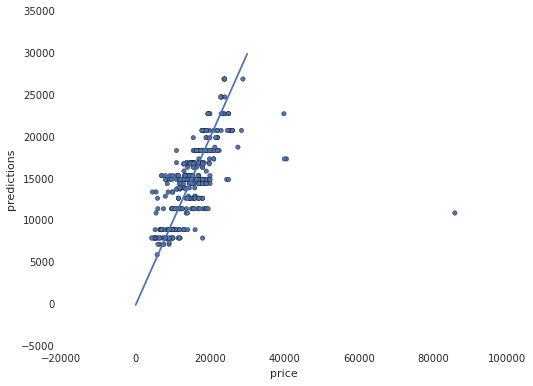

In [39]:
predictions = model.predict(df_predict[predictors])
df_predict['predictions'] = predictions

fig, ax = plt.subplots(figsize=(8, 6))
ax = df_predict.plot('price', 'predictions', kind='scatter', ax=ax)
ax.plot([0, 30000], [0, 30000])
plt.show()

This looks good, there are a few outliers, let's check them out in the original data set

In [40]:
df[df.price > 80000]

,bhp,desc,fuel,loc,miles,price,transmission
33,161,BMW 1 SERIES 120D SPORT ...,Diesel,Leicestershire,85800,85800,Manual


## Differences

Now we want to evaluate just how good out predictions are:

In [48]:
df_predict['diffs'] = np.abs(df_predict.price - df_predict.predictions)

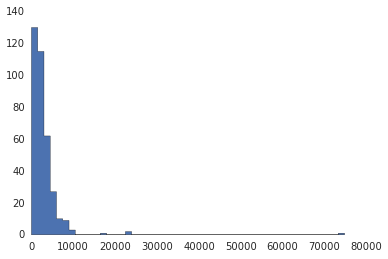

In [55]:
ax = plt.subplot(111)
out = ax.hist(df_predict.diffs.values, histtype="stepfilled", bins=50)
plt.show()

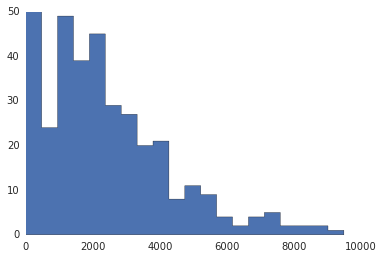

In [60]:
ax = plt.subplot(111)
out = ax.hist(df_predict[df_predict.diffs < 10000].diffs.values, histtype="stepfilled", bins=20)
plt.show()

This is really quite bad. I would be fairly upset if I was £2000 pounds out!